<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Carren_Exercise_Week_4_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
#1

penguins=pd.read_csv('https://raw.githubusercontent.com/CarrenP/files/refs/heads/main/penguins_size.csv')
penguins.head(10)

# importing data set dari github dengan tipe file csv dan juga print 10 kolum teratas dari data yang ada.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
#2
penguins.info()

# menunjukan informasi mengenai tabel, dari data type, jumlah data hingga nama kolum.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [43]:
#3
penguins.describe()

# menampilkan ringkasan statistik dari dataset penguins yang berisi informasi tentang kolom numerik.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.922156,0.649701,43.994311,17.160479,201.014970,4209.056886,1.500000
std,0.890349,0.714532,5.460521,1.967909,14.022175,804.836129,0.506712
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,1.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,2.000000
75%,2.000000,1.000000,48.575000,18.700000,213.000000,4793.750000,2.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,2.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
#4
species_count = penguins['species'].value_counts(dropna=False)
island_count = penguins['island'].value_counts(dropna=False)
sex_count = penguins['sex'].value_counts(dropna=False)

print( species_count)
print( island_count)
print( sex_count)

# mencari tahu jumlah dari setiap kategori yang berada dalam kolum species, island, dan juga sex, termasuk juga null value.

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [6]:
#5

penguins = penguins.dropna()
penguins.isnull().sum()

#menghapus baris yang memiliki nilai null, saya memilih untuk emnghilangkan karena menurut saya jumlah yang perlu dihilangkan tidaklah banyak sehingga tidak akan memberikan pengaruh signifikan.

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

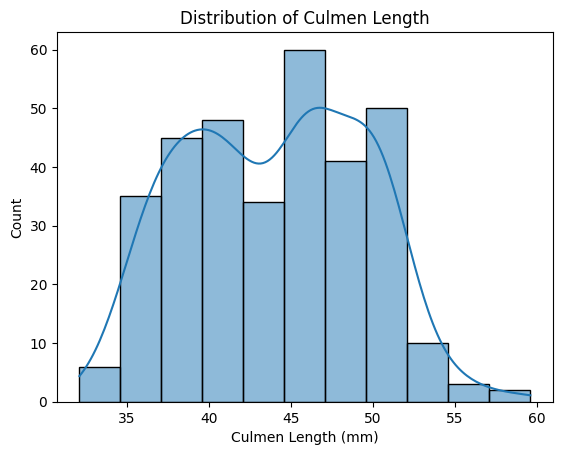

In [7]:
#6
sns.histplot(penguins['culmen_length_mm'].dropna(), kde=True)
plt.title('Distribution of Culmen Length')
plt.xlabel('Culmen Length (mm)')
plt.show()

# Distribusi ini terlihat sedikit lebih condong ke kanan, yang berarti ada lebih banyak penguin dengan panjang culmen yang lebih pendek, sementara penguin dengan panjang culmen yang lebih
# panjang lebih jarang ditemukan.Puncaknya berada di sekitar kisaran 45-47 mm, yang mengindikasikan bahwa banyak penguin yang memiliki panjang culmen dalam kisaran ini.

7. Check unique value of our target variable

In [8]:
#7

penguins.species.unique()

# mengecek nilai unik dri kolum species.

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

8. encode categorical columns and display the results

In [9]:
#8
label_encoder=LabelEncoder()
penguins['island']=label_encoder.fit_transform(penguins['island'])
penguins['sex']=label_encoder.fit_transform(penguins['sex'])
penguins

# menguah data kategorikal menjadi numerik pada kolom island dan sex.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,1
340,Gentoo,0,46.8,14.3,215.0,4850.0,1
341,Gentoo,0,50.4,15.7,222.0,5750.0,2
342,Gentoo,0,45.2,14.8,212.0,5200.0,1


9. encode the target column and display the results

In [10]:
#9
label_encoder=LabelEncoder()
penguins['species']=label_encoder.fit_transform(penguins['species'])
penguins

# menguah data kategorikal menjadi numerik pada kolom species.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


10. create a heatmap to see the correlation and explain the conclusion

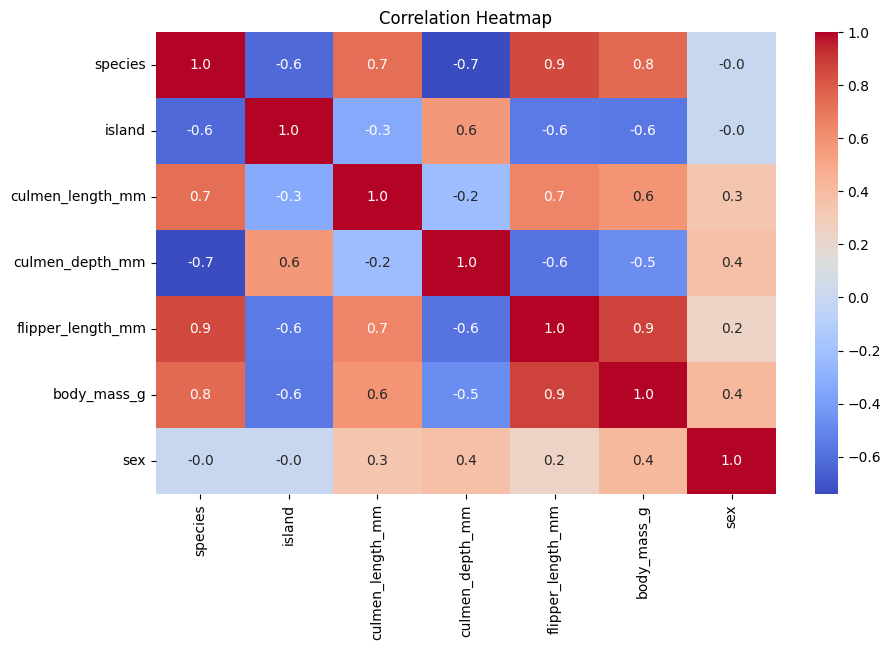

In [11]:
#10

correlation_matrix = penguins.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

# untuk memunculkan visualisasi heatmap

## Machine Learning

1. Splitting X and y

In [12]:
#1
X=penguins.drop('species',axis=1)
y=penguins['species']

# membuat X berisi semua kolom kecuali kolom species, dan y berisi kolom species dari DataFrame

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [13]:
#2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# membagi dataset, training sebesar 80% dan test sebesar 20%

In [14]:
#3
X_train.shape,X_test.shape

# menampilkan jumlah baris dan kolum dari variabel X_train dan X-test

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [15]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_entropy.fit(X_train, y_train)

clf_entropy

# membuat, melatih, dan menampilkan model Decision Tree berbasis entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
#b
y_pred = clf_entropy.predict(X_test)

# mencari hasil prediksi tentang spesies penguin dari data pengujian menggunakan metode entropy

In [17]:
#c
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model on the training data
model_gini.fit(X_train, y_train)

y_pred = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion gini index: {accuracy_gini:.4f}")

# melatih, memprediksi, dan menghitung akurasi model Decision Tree menggunakan kriteria Gini index

Model accuracy score with criterion gini index: 0.9851


In [18]:
#d
y_train_pred = model_gini.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = model_gini.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

#  membandingkan akurasi pelatihan dan akurasi pengujian dari model Decision Tree berbasis Gini yang telah dilatih dan jug amelihat apakh modelnya over atau under fititng

Training accuracy: 0.9738
Test accuracy: 0.9851
The model might be underfitting.


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

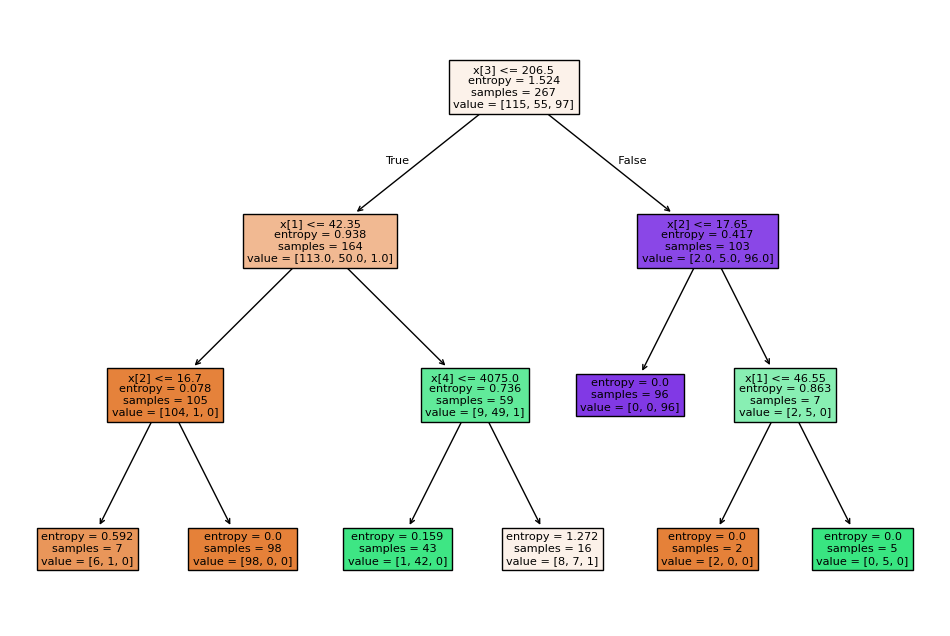

In [19]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train), filled=True)

# menampilkan decision tree berbasis entropy

2. Criterion Gini index

In [20]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

clf_gini

# membuat dan melatih model Decision Tree menggunakan Gini index

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
#b
y_pred_gini = clf_gini.predict(X_test)

# mencari hasil prediksi tentang spesies penguin dari data pengujian menggunakan metode gini

In [22]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

 # print hasil akurasi

Model accuracy score with criterion gini: 0.9851


In [23]:
#d
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# menampilkan akurasi dari model Decision Tree

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

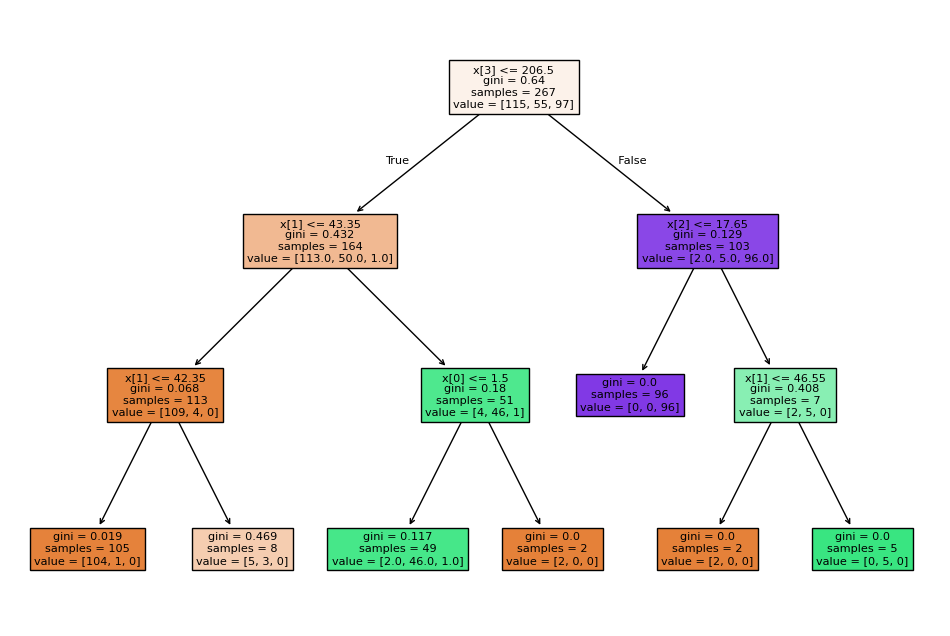

In [24]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True)

# menapilkan decision tree berbasis gini

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [25]:
#f

cmatrix = confusion_matrix(y_test, y_pred) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cmatrix)

cmatrix = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cmatrix)

# Code ini digunakn untuk mencetak confusion matrix.

Confusion Matrix:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [26]:
#g
report = classification_report(y_test, y_pred)
print("Classification Report Entropy:\n", report)

report = classification_report(y_test, y_pred_gini)
print("Classification Report Gini:\n", report)

# menghasilkan dan menampilkan laporan klasifikasi untuk model Decision Tree entropy dan Gini index

Classification Report Entropy:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67

Classification Report Gini:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [27]:
#h

# performa dari kedua model adalah sama. Sehingga dapat disimpulkan bahwa performa kedua model adalah sama baiknya dengan akurasi yang hampir sempurna.Ini menunjukkan bahwa model ini mampu menggeneralisasi dengan baik pada dataset yang diberikan dan tidak menunjukkan tanda-tanda overfitting.


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [28]:
#a

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# menginstal objek Gaussian Naive Bayes dari pustaka scikit-learn.melatih model Naive Bayes yang telah dibuat

GaussianNB()

In [29]:
#b

nb_y_pred = nb_classifier.predict(X_test)

# untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya


In [31]:
#c
cmatrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", cmatrix)

#Untuk membuat dan menampilkan confussion matrix dari naive bayes

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) \

# menujukan hasil akurasi

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0000


In [32]:
#e

print(classification_report(y_test, nb_y_pred))

# menampilkan classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
#f

#  hasil ini menunjukkan bahwa model Naive Bayes sangat baik dalam mengklasifikasikan data uji dengan akurasi 100% untuk semua kelas.Ini menunjukkan bahwa model sangat efektif untuk dataset ini.

In [33]:
# menggunakan logistic regression

#a

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# melatih model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
#b

y_pred_log = classifier.predict(X_test)

comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

print(comparison_table.head())

# Membuat prediksi dataframe perbandingan dan juga menampilkan 5 row pertama.

     y_test  y_pred
30        0       0
317       2       2
79        0       0
201       1       1
63        0       0


In [39]:
#c

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

#menampilkan hasil akurasi dari logistic regression

Accuracy Score: 0.9851


In [40]:
# d

cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)

# menampilkan confusion matrix

Confusion Matrix:
 [[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


Good Luck :)

In [41]:
# e

print (classification_report (y_test, y_pred_log))

# menampilkan classification report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [ ]:
#f

# model ini menunjukkan kinerja yang sangat baik. Walaupun precision 1 memiliki persenatse yang lebih rendah dibanding yang lain, akan tetapi prediksi masih dapat dilakukan dengan baik.